In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

In [2]:
%cd "/content/drive/MyDrive/forecasting-clima"

/content/drive/MyDrive/forecasting-clima


In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
# Este dataframe tiene los datos completos
df = pd.read_csv("data/aeropuerto_5years.csv", delimiter=',', decimal=',')

In [37]:
df.head()

,fecha,indicativo,nombre,provincia,altitud,tmed,prec,tmin,horatmin,tmax,horatmax,dir,velmedia,racha,horaracha,sol,presMax,horaPresMax,presMin,horaPresMin
0,2018-01-01,8414A,VALENCIA AEROPUERTO,VALENCIA,56,12.0,"0,0",7.7,06:47,16.3,14:02,26,8.1,16.9,14:25,8.1,1024.5,Varias,1019.1,16
1,2018-01-02,8414A,VALENCIA AEROPUERTO,VALENCIA,56,15.0,"0,0",10.7,Varias,19.3,14:41,26,6.4,13.9,12:46,7.2,1022.6,Varias,1018.7,15
2,2018-01-03,8414A,VALENCIA AEROPUERTO,VALENCIA,56,15.8,"0,0",10.5,05:02,21.1,13:29,25,6.7,13.3,12:59,6.7,1021.9,Varias,1017.4,15
3,2018-01-04,8414A,VALENCIA AEROPUERTO,VALENCIA,56,16.6,"0,0",12.4,04:15,20.9,13:44,25,6.1,16.4,14:37,8.9,1018.8,00,1010.7,24
4,2018-01-05,8414A,VALENCIA AEROPUERTO,VALENCIA,56,13.6,"0,0",8.7,23:10,18.6,12:29,28,6.7,16.9,12:44,9.0,1010.9,00,998.8,24


In [51]:
df.describe()

,altitud,tmed,tmin,tmax,dir,velmedia,racha,sol,presMax,presMin
count,1826.0,1826.000000,1826.000000,1826.000000,1826.000000,1826.000000,1826.000000,1826.000000,1826.000000,1826.000000
mean,56.0,18.359529,12.884775,23.837788,41.628697,3.879025,10.527437,8.133844,1012.239978,1007.510843
std,0.0,6.177530,6.525675,6.352892,39.294674,1.727478,3.829550,4.004672,6.017739,6.698179
min,56.0,4.000000,-2.300000,6.300000,1.000000,0.300000,3.600000,0.000000,990.000000,980.900000
25%,56.0,13.100000,7.600000,18.600000,9.000000,2.800000,8.300000,5.500000,1008.600000,1003.700000
50%,56.0,17.900000,12.500000,23.700000,26.000000,3.600000,9.700000,9.000000,1011.700000,1007.500000
75%,56.0,23.875000,18.600000,29.275000,99.000000,4.400000,12.500000,11.100000,1015.875000,1011.700000
max,56.0,33.400000,27.100000,42.400000,99.000000,13.600000,30.300000,14.400000,1030.000000,1025.200000


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1826 entries, 0 to 1825
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   fecha        1826 non-null   object 
 1   indicativo   1826 non-null   object 
 2   nombre       1826 non-null   object 
 3   provincia    1826 non-null   object 
 4   altitud      1826 non-null   int64  
 5   tmed         1826 non-null   float64
 6   prec         1826 non-null   object 
 7   tmin         1826 non-null   float64
 8   horatmin     1826 non-null   object 
 9   tmax         1826 non-null   float64
 10  horatmax     1826 non-null   object 
 11  dir          1826 non-null   int64  
 12  velmedia     1826 non-null   float64
 13  racha        1826 non-null   float64
 14  horaracha    1826 non-null   object 
 15  sol          1826 non-null   float64
 16  presMax      1826 non-null   float64
 17  horaPresMax  1826 non-null   object 
 18  presMin      1826 non-null   float64
 19  horaPr

In [52]:
df.nunique()

fecha          1826
indicativo        1
nombre            1
provincia         1
altitud           1
tmed            252
prec            138
tmin            266
horatmin        489
tmax            276
horatmax        406
dir              36
velmedia         46
racha            53
horaracha       640
sol             145
presMax         303
horaPresMax      16
presMin         331
horaPresMin      23
dtype: int64

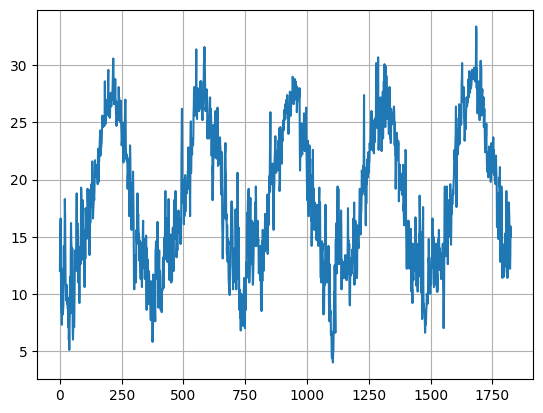

In [47]:
df["tmed"].plot()
plt.grid()

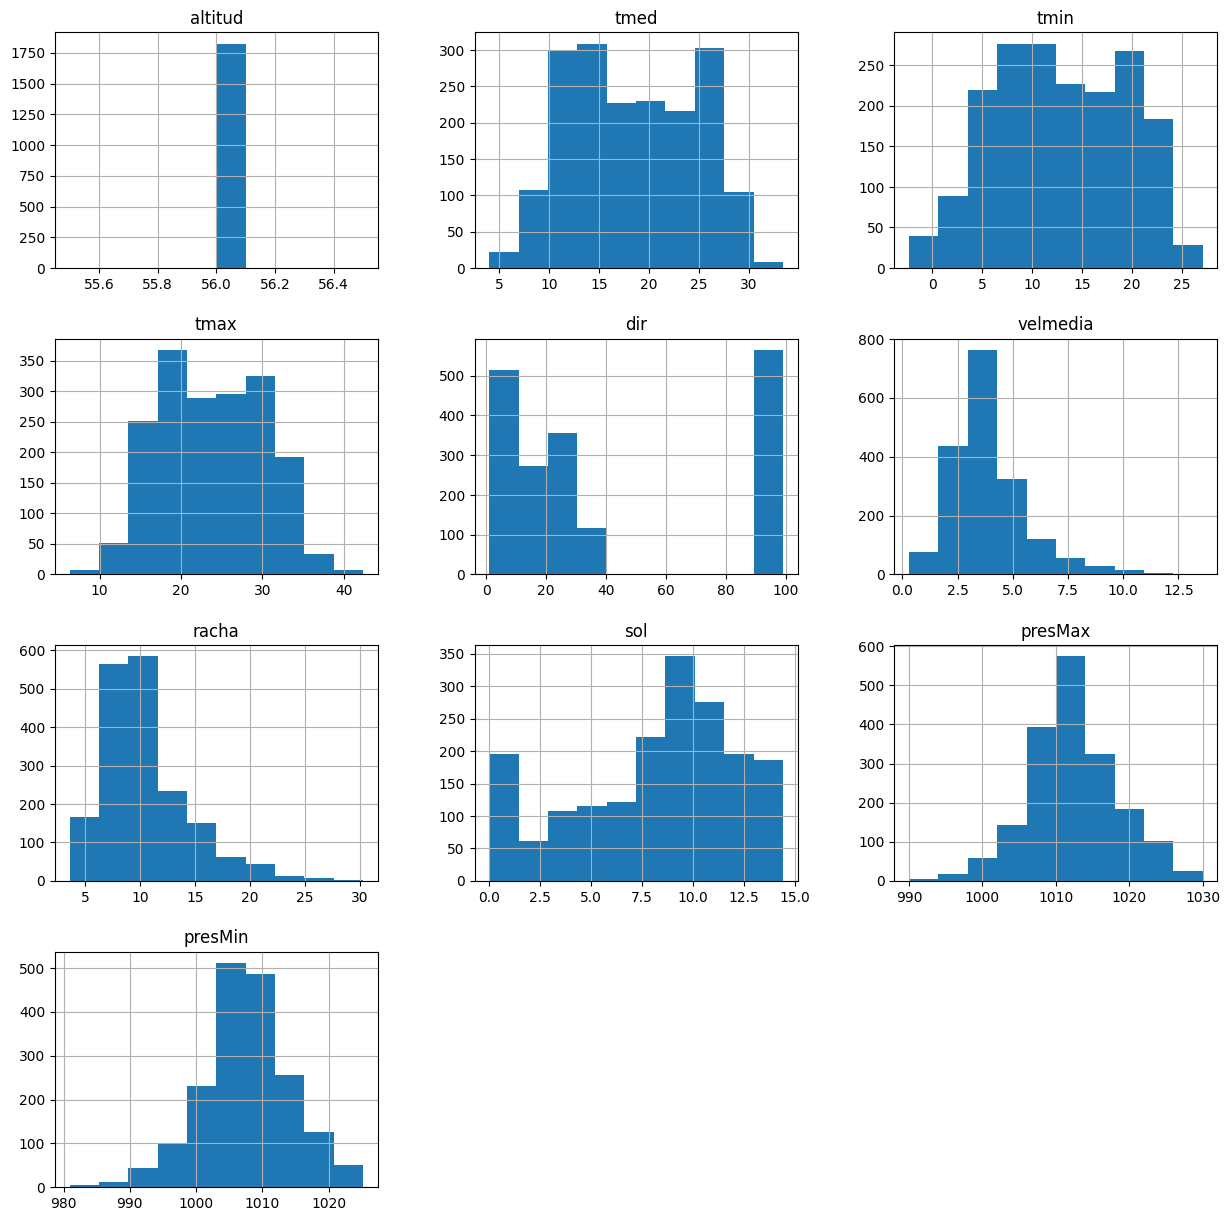

In [53]:
df.hist(figsize = (15, 15))
plt.show()

In [45]:
sns.pairplot(df)

Output hidden; open in https://colab.research.google.com to view.

<ipython-input-49-fa6ecf61a48a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


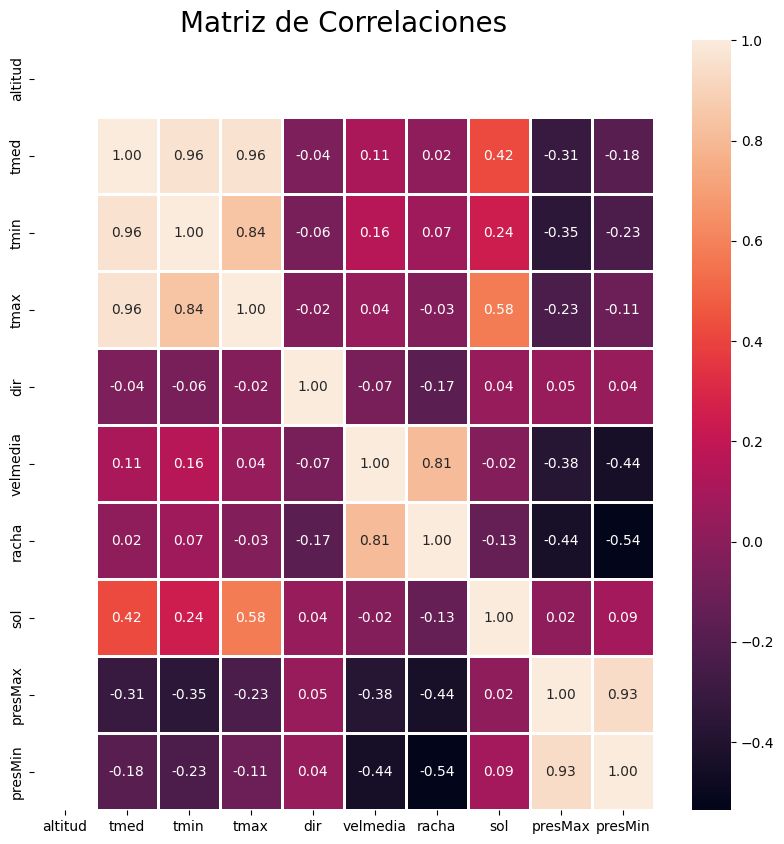

In [49]:
corr_matrix = df.corr()
plt.figure(figsize = (10, 10))
sns.heatmap(corr_matrix, linewidths = 1, annot = True, fmt = ".2f")
plt.title("Matriz de Correlaciones", fontsize = 20)
plt.show()

In [54]:
df['fecha'] = pd.to_datetime(df['fecha'], format='%Y-%m-%d')
df.set_index('fecha', inplace=True)

In [86]:
ts = pd.Series(df["tmed"])

In [84]:
df_agrupado_1M = df.groupby(pd.Grouper(freq='1M')).mean()

<ipython-input-84-d24d2ce48425>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_agrupado_1M = df.groupby(pd.Grouper(freq='1M')).mean()


In [ ]:
ts = pd.Series(df_agrupado_1M["tmed"])

In [58]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 19.0 MB/s eta 0:00:00


In [59]:
from pmdarima.arima import auto_arima

In [88]:
model = auto_arima(ts, seasonal=True)
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   60
Model:               SARIMAX(2, 0, 2)   Log Likelihood                -107.975
Date:                Fri, 06 Oct 2023   AIC                            227.951
Time:                        09:36:03   BIC                            240.517
Sample:                    01-31-2018   HQIC                           232.866
                         - 12-31-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      4.9081      0.101     48.762      0.000       4.711       5.105
ar.L1          1.7314      0.005    358.974      0.000       1.722       1.741
ar.L2         -0.9984      0.004   -251.848      0.0

In [89]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(ts, order=(2,0,2)).fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [90]:
forecast = model.forecast(steps=12)

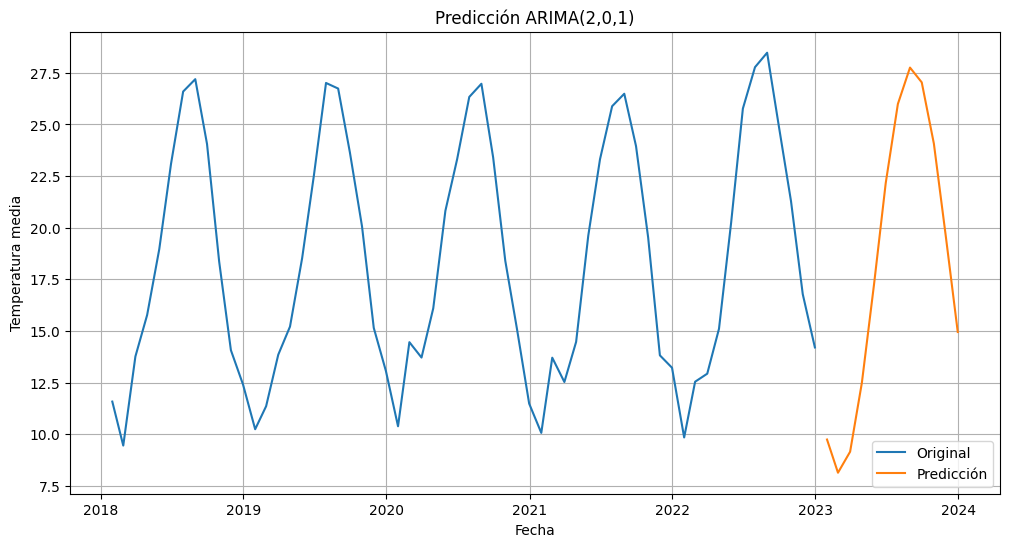

In [91]:
# Representar la predicción frente al conjunto de test
plt.figure(figsize=(12, 6))
plt.plot(ts.index, ts, label='Original')
plt.plot(forecast, label='Predicción')
plt.xlabel('Fecha')
plt.ylabel('Temperatura media')
plt.title('Predicción ARIMA(2,0,2)')
plt.legend()
plt.grid()

plt.show()